## A tale of two variables

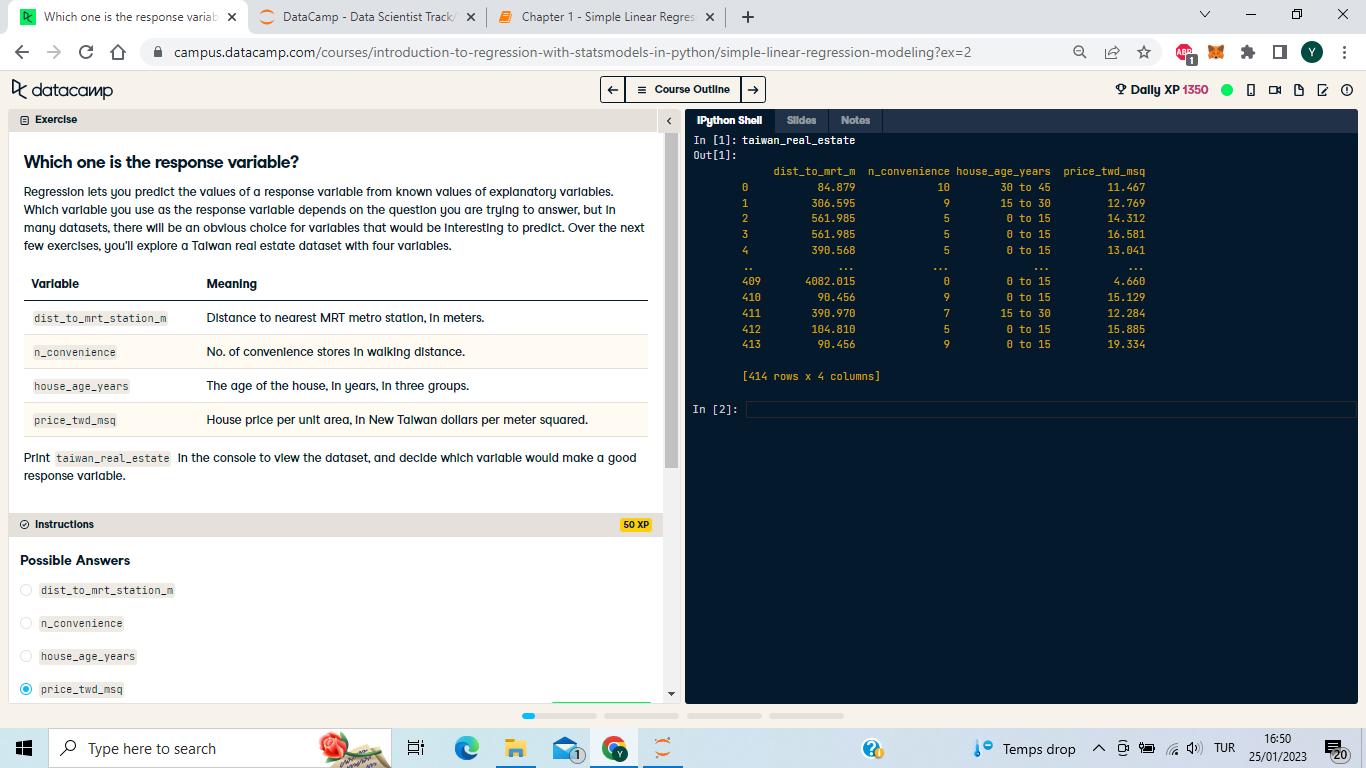

Rapid response! Predicting prices is a common business task, so house price makes a good response variable.

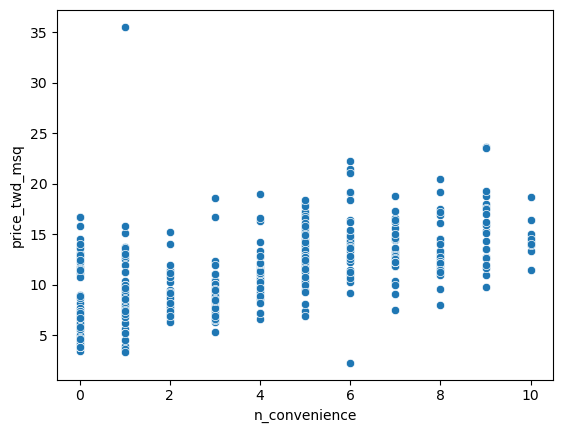

In [1]:
# import pandas as pd 
import pandas as pd

# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# import relavant dataset
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")

# Draw the scatter plot
sns.scatterplot(x = "n_convenience", y = "price_twd_msq", data = taiwan_real_estate)

# Show the plot
plt.show()

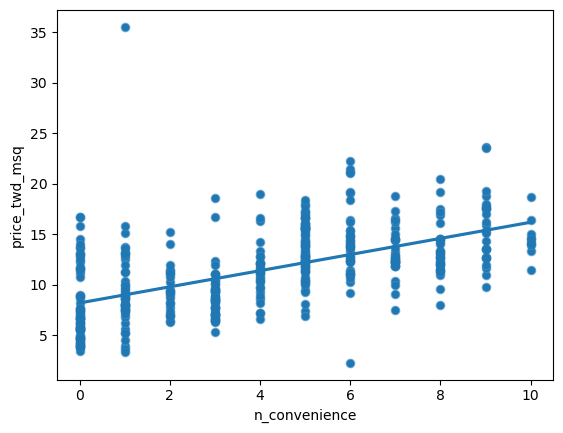

In [9]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

Scholarly scatter plotting! Scatter plots are the standard way to visualize the relationship between two numeric variables, and seaborn makes adding linear trend lines easy.

## Fitting a linear regression

#### Estimate the intercept

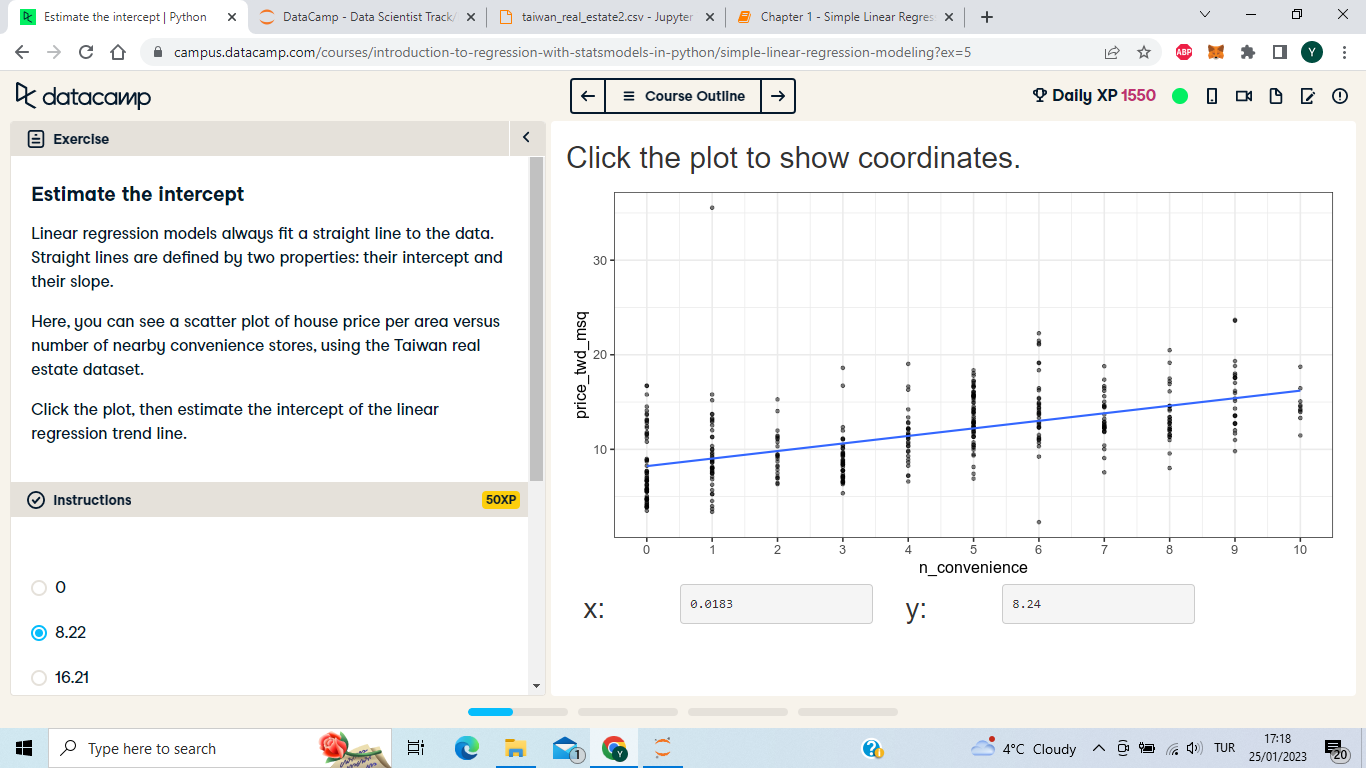

Excellent estimation! At this point, the trend line crosses the y-axis or x = 0.

#### Estimate the slope

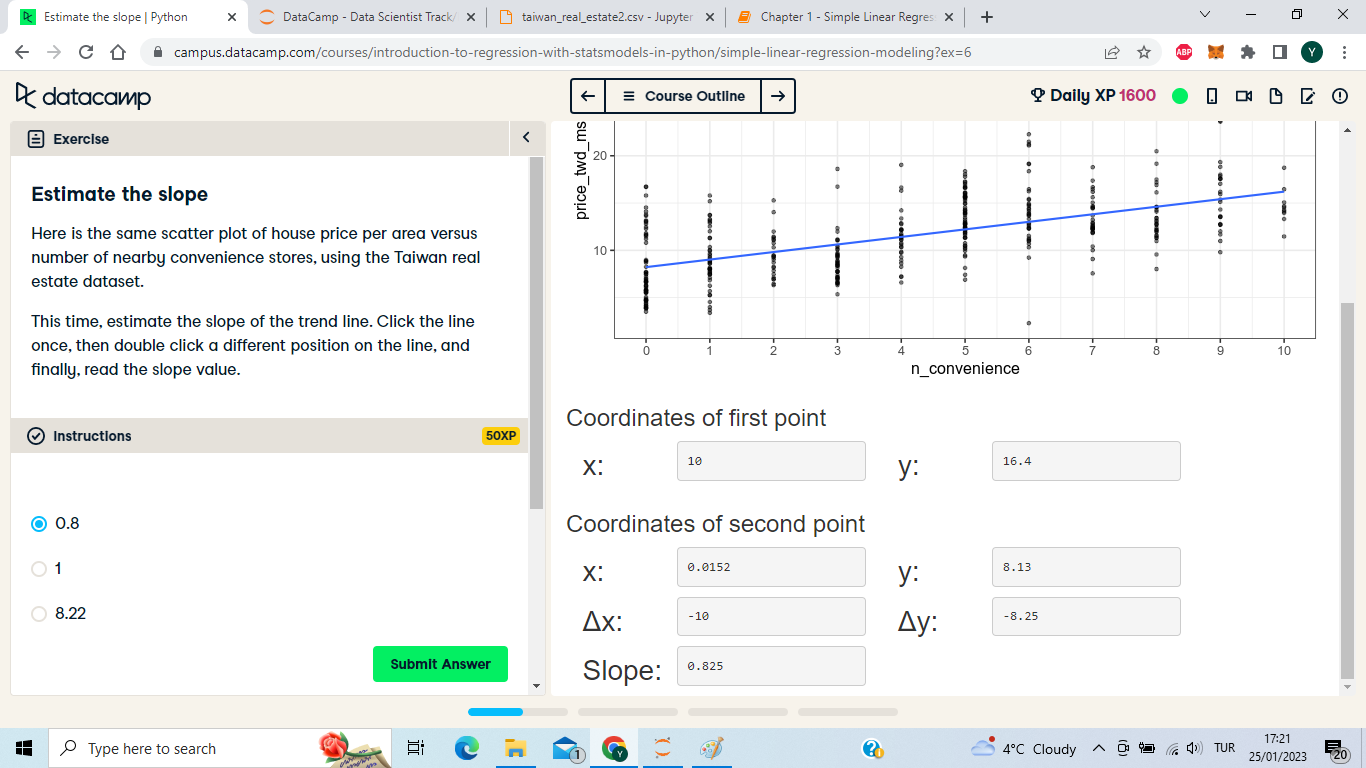

Super slope-estimation! The slope is the rate of change in the y direction divided by the rate of change in the x direction.

#### Linear regression with ols()
While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

Time to run your first model!

taiwan_real_estate is available. TWD is an abbreviation for Taiwan dollars.

In addition, for this exercise and the remainder of the course, the following packages will be imported and aliased if necessary: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

In [3]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


<strong>Question 1</strong><br>
The model had an Intercept coefficient of 8.2242. What does this mean?

a.On average, houses had a price of 8.2242 TWD per square meter.<br>
<strong>b.On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.</strong><br>
c.The minimum house price was 8.2242 TWD per square meter.<br>
d.The minimum house price with zero convenience stores nearby was 8.2242 TWD per square meter.<br>
e.The intercept tells you nothing about house prices.

<strong>Question 2</strong><br>
The model had an n_convenience coefficient of 0.7981. What does this mean?

<strong>a.If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter..</strong><br>
b.If you increase the house price by 0.7981 TWD per square meter, then the expected increase in the number of nearby convenience stores is one.<br>
c.If you increase the number of nearby convenience stores by 0.7981, then the expected increase in house price is one TWD per square meter..<br>
d.If you increase the house price by one TWD per square meter, then the expected increase in the number of nearby convenience stores is 0.7981..<br>
e.The n_convenience coefficient tells you nothing about house prices..

Lively linear regression modeling! The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house.

#### Visualizing numeric vs. categorical
If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

taiwan_real_estate is available.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


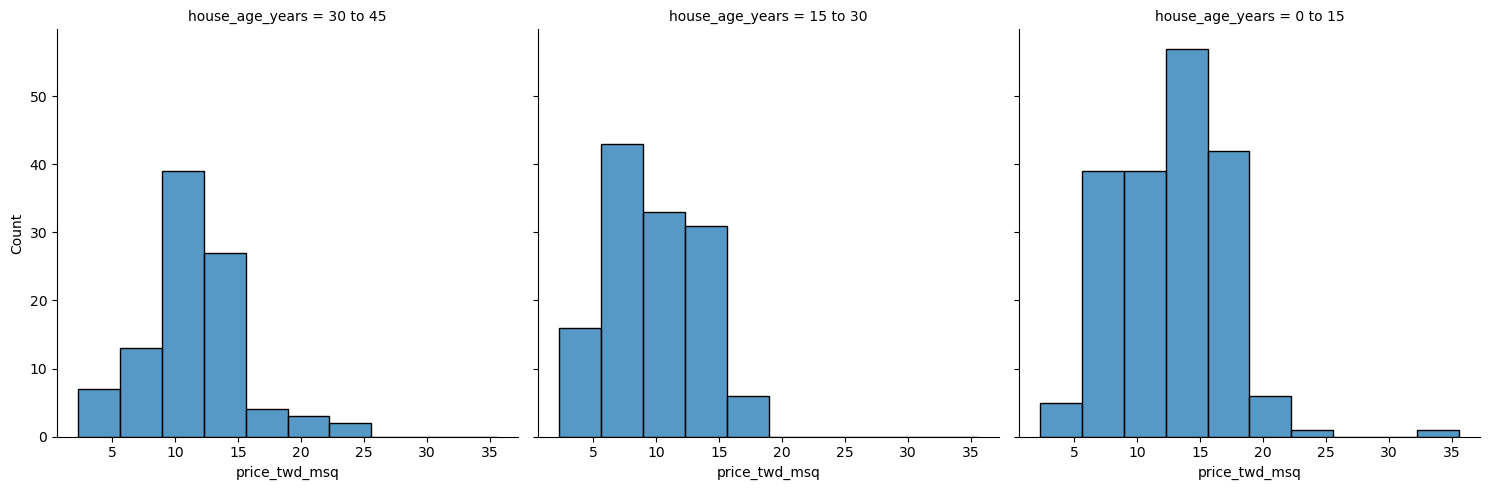

In [4]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
           x="price_twd_msq",
           bins=10,
           col="house_age_years")

# Show the plot
plt.show()

High five for histograms! It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

#### Calculating means by category
A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

taiwan_real_estate is available as a pandas DataFrame.

In [5]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


Stunning summary stat calculation! Make a mental note of the results, as they'll feature in the next exercise too.

#### Linear regression with a categorical explanatory variable
Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.

To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.

taiwan_real_estate is available and the ols() function is also loaded.

In [6]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params, "\n")

# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64 

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


Classy categorical linear regression! The coefficients of the model are just the means of each category you calculated previously. Fantastic job!
